# Data Analysis of Data Analysts

Project 1

In [2]:
# Dependencies and Setup
import os
import csv
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import requests
import json

# Import the API key
from config import acct_id
from config import api_key

In [3]:
#Section 1b
#Linear regression (scatter-plot) - State population (census csv), 
# data analysts, per state, projected growth per state
all_state_pop = pd.read_csv('census_state_pop_20to22.csv', index_col='NAME')

all_state_pop

,SUMLEV,REGION,DIVISION,STATE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,NPOPCHG_2021,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
NAME,,,,,,,,,,,,,,,,,,,,,
United States,10,0,0,0,331449520,331511512,332031554,333287557,61992,520042,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
Northeast Region,20,1,0,0,57609156,57448898,57259257,57040406,-160258,-189641,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
New England,30,1,1,0,15116206,15074473,15121745,15129548,-41733,47272,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
Middle Atlantic,30,1,2,0,42492950,42374425,42137512,41910858,-118525,-236913,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
Midwest Region,20,2,0,0,68985537,68961043,68836505,68787595,-24494,-124538,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,40,4,9,53,7705247,7724031,7740745,7785786,18784,16714,...,8.400898,9.117040,2.264113,1.737928,1.809144,4.831987,-1.990071,-0.461146,-0.180927,4.370841
West Virginia,40,3,5,54,1793755,1791420,1785526,1775156,-2335,-5894,...,15.341020,16.649619,-5.665727,-6.829029,0.406492,0.995877,1.602484,0.266241,2.008976,1.262118
Wisconsin,40,2,3,55,5893725,5896271,5880101,5892539,2546,-16170,...,10.496442,10.770227,-0.305357,-0.298659,0.541593,1.388643,-3.209987,1.300813,-2.668394,2.689456


In [4]:
pop22 = all_state_pop[['POPESTIMATE2022']]
#pop22
state_pop22_part1 = pop22[14:22]
state_pop22_part2 = pop22[23:65]

state_pop_clean = pd.concat([state_pop22_part1, state_pop22_part2], axis=0, ignore_index=False)
#print(state_pop_clean)

#return a line indicating the number of states included
#I guess this isn't really important since we'll be extracting state population by name
print(f'There are {len(state_pop_clean)} states in this dataset.\n')

#also want to convert state names to abbreviations
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#create new column to hold state abbreviations
state_pop_clean['State'] = ''
index = state_pop_clean.index
for index, row in state_pop_clean.iterrows():
    state_name = index
    state_abb = state_dict.get(state_name, 'Not Found')
    state_pop_clean.loc[index, 'State'] = state_abb

print(state_pop_clean)

There are 50 states in this dataset.

                POPESTIMATE2022 State
NAME                                 
Alabama                 5074296    AL
Alaska                   733583    AK
Arizona                 7359197    AZ
Arkansas                3045637    AR
California             39029342    CA
Colorado                5839926    CO
Connecticut             3626205    CT
Delaware                1018396    DE
Florida                22244823    FL
Georgia                10912876    GA
Hawaii                  1440196    HI
Idaho                   1939033    ID
Illinois               12582032    IL
Indiana                 6833037    IN
Iowa                    3200517    IA
Kansas                  2937150    KS
Kentucky                4512310    KY
Louisiana               4590241    LA
Maine                   1385340    ME
Maryland                6164660    MD
Massachusetts           6981974    MA
Michigan               10034113    MI
Minnesota               5717184    MN
Mississippi 

In [4]:
#Include Artien's code for state data
#Create a list of all 50 states

states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA",
          "ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD",
         "TN","TX","UT","VT","VA","WA","WV","WI","WY"]

#Use this list to create a Dataframe with empty columns for Median Salary (State/National) as well as for 
#Estimated/Projected jobs

states_df = pd.DataFrame(states)
states_df[["Estimated Jobs","Projected Jobs","Median Salary (State)","Median Salary (National)"]] = ""
states_df = states_df.rename(columns={0:"State"})
states_df

# Create variables to store the base_url for the career one stop API.
# Create varibales to store the paramaters of the API call and set params to equal these variables.
headers = {"Authorization": f"Bearer {api_key}"}
base_url = "https://api.careeronestop.org/v1/occupation" 
training ="false"
interest ="false"
videos = "false"
tasks = "false"
dwas ="false"
wages = "true"
alternateOnetTitles = "false"
projectedEmployment = "true"
ooh ="false"
stateLMILinks = "false"
relatedOnetTitles ="false"
skills ="false"
knowledge ="false"
ability = "false"
trainingPrograms ="false"
params = {"training":training,
         "interest":interest,
         "videos":videos,
         "tasks":tasks,
         "dwas":dwas,
         "wages":wages,
         "alternateOnetTitles":alternateOnetTitles,
         "projectedEmployment":projectedEmployment,
         "ooh":ooh,
         "stateLMILinks":stateLMILinks,
         "relatedOnetTitles":relatedOnetTitles,
         "skills":skills,
         "knowledge":knowledge,
         "ability":ability,
         "trainingPrograms":trainingPrograms}
counter = 1

# Create a for loop to iterate through the DataFrame, capturing the state of that row in a variable and using it for the 
# API call for that state. Capture the relevant info in the API call and store in into the DataFrame directly.

# Add an except clause to notify if there is missing or unavailable information for a State.

# Since the API's format is inconsistent (i.e. hourly and annual rates are found in different order/missing, 
#estimated/projected job information is sometimes missing), specific responses for wages and projections were stored in
# variables. List comprehensions were done on these variables not only to ensure the correct information is being found,
# but also return "N/A" in the DataFrame for missing information.

for index, row in states_df.iterrows():

    state = states_df.loc[index,"State"]
    api_url_2 = f"{base_url}/{acct_id}/Data%20Scientists/{state}?{params}"
    response_2= requests.get(api_url_2,headers=headers,params=params).json()
    result_wage = response_2["OccupationDetail"][0]["Wages"]["StateWagesList"]
    result_jobs = response_2["OccupationDetail"][0]["Projections"]["Projections"]

    try:

        states_df.loc[index,"Median Salary (National)"] = response_2["OccupationDetail"][0]["Wages"]["NationalWagesList"][0]["Median"]
    
        median_state_salary = [x['Median'] for x in result_wage if x['RateType']== 'Annual']
        states_df.loc[index,"Median Salary (State)"] = median_state_salary[0] if median_state_salary else "N/A"
                               
        estimated_jobs = [x['EstimatedEmployment'] for x in result_jobs if x['StateName'] != "United States"]
        states_df.loc[index,"Estimated Jobs"] = estimated_jobs[0] if estimated_jobs else "N/A"
                          
        projected_jobs = [x['ProjectedEmployment'] for x in result_jobs if x['StateName'] != "United States"]
        states_df.loc[index,"Projected Jobs"] = projected_jobs[0] if projected_jobs else "N/A"

        print(f"Retrieving Data for {state}: {counter}/50")
        counter = counter +1

    except: 
        print(f"Some information missing for {state}")
        counter = counter+1
        
states_df

# States with one or more missing data points is not helpful in answering the questions we have posed, and are therefore
# dropped. Dropped states include: AR,DE,MT,NM,ND,VT,WY

states_df.replace('N/A', np.nan, inplace=True)
states_df.dropna(inplace=True)
states_df.reset_index(inplace=True,drop=True)
states_df

Retrieving Data for AL: 1/50
Retrieving Data for AK: 2/50
Retrieving Data for AZ: 3/50
Retrieving Data for AR: 4/50
Retrieving Data for CA: 5/50
Retrieving Data for CO: 6/50
Retrieving Data for CT: 7/50
Retrieving Data for DE: 8/50
Retrieving Data for FL: 9/50
Retrieving Data for GA: 10/50
Retrieving Data for HI: 11/50
Retrieving Data for ID: 12/50
Retrieving Data for IL: 13/50
Retrieving Data for IN: 14/50
Retrieving Data for IA: 15/50
Retrieving Data for KS: 16/50
Retrieving Data for KY: 17/50
Retrieving Data for LA: 18/50
Retrieving Data for ME: 19/50
Retrieving Data for MD: 20/50
Retrieving Data for MA: 21/50
Retrieving Data for MI: 22/50
Retrieving Data for MN: 23/50
Retrieving Data for MS: 24/50
Retrieving Data for MO: 25/50
Retrieving Data for MT: 26/50
Retrieving Data for NE: 27/50
Retrieving Data for NV: 28/50
Retrieving Data for NH: 29/50
Retrieving Data for NJ: 30/50
Retrieving Data for NM: 31/50
Retrieving Data for NY: 32/50
Retrieving Data for NC: 33/50
Retrieving Data for

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National)
0,AL,220,280,85870,103500
1,AK,90,90,100040,103500
2,AZ,"1,440","2,170",102770,103500
3,CA,"18,400","26,700",126810,103500
4,CO,740,900,103200,103500
5,CT,860,"1,100",105700,103500
6,FL,"2,550","3,900",100520,103500
7,GA,"2,250","3,030",100400,103500
8,HI,50,60,112330,103500
9,ID,0,0,96490,103500


In [5]:
#Save the file as a csv so we don't need to keep regenerating the table
#uncomment the following line to save a new csv
#states_df.to_csv('state_data.csv', index=False)

In [5]:
#Need to add state population estimate data from census df to Artien's df
#re-visualize the census df
#print(state_pop_clean)
states_df = pd.read_csv('state_data.csv')
states_with_pop = pd.merge(states_df, state_pop_clean, how='left', on='State')
states_with_pop = states_with_pop.rename(columns={'POPESTIMATE2022':'2022 Population Estimates'})
print(states_with_pop.dtypes)
states_with_pop
states_with_pop['Estimated Jobs'] = states_with_pop['Estimated Jobs'].str.replace(',', '')
states_with_pop['Estimated Jobs'] = states_with_pop['Estimated Jobs'].astype('int64')
states_with_pop['Projected Jobs'] = states_with_pop['Projected Jobs'].str.replace(',', '')
states_with_pop['Projected Jobs'] = states_with_pop['Projected Jobs'].astype('int64')
states_with_pop['Median Salary (State)'] = states_with_pop['Median Salary (State)'].astype('int64')
#states_with_pop['Estimated Jobs'] = analysts_with_pop['Estimated Jobs'].str.replace(',', '').astype(int)
print(states_with_pop.dtypes)
print(states_with_pop)

State                        object
Estimated Jobs               object
Projected Jobs               object
Median Salary (State)         int64
Median Salary (National)      int64
2022 Population Estimates     int64
dtype: object
State                        object
Estimated Jobs                int64
Projected Jobs                int64
Median Salary (State)         int64
Median Salary (National)      int64
2022 Population Estimates     int64
dtype: object
   State  Estimated Jobs  Projected Jobs  Median Salary (State)  \
0     AL             220             280                  85870   
1     AK              90              90                 100040   
2     AZ            1440            2170                 102770   
3     CA           18400           26700                 126810   
4     CO             740             900                 103200   
5     CT             860            1100                 105700   
6     FL            2550            3900                 100520   
7   

In [8]:
#Calculate the number of jobs in each state per capita
#states_with_pop['Estimated Jobs'] / states_with_pop['2022 Population Estimates']
states_with_pop['Jobs per Capita'] = ''
states_with_pop['Jobs per Capita (E-5)'] = ''
states_with_pop
for index, row in states_with_pop.iterrows():
    #get the number of estimated jobs and population
    estimated_jobs = row['Estimated Jobs']
    population = row['2022 Population Estimates']
    
    #calculate the number of jobs per capita
    jobs_per_capita = estimated_jobs / population
    
    #add to appropriate column
    states_with_pop.loc[index, 'Jobs per Capita'] = jobs_per_capita
    
    #convert the number of jobs per capita by multiplying by 100000
    adj_jobs_per_capita = jobs_per_capita * 100000
    states_with_pop.loc[index, 'Jobs per Capita (E-5)'] = adj_jobs_per_capita
    

states_with_pop

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),2022 Population Estimates,Jobs per Capita,Jobs per Capita (E-5)
0,AL,220,280,85870,103500,5074296,0.000043,4.335577
1,AK,90,90,100040,103500,733583,0.000123,12.26855
2,AZ,1440,2170,102770,103500,7359197,0.000196,19.567352
3,CA,18400,26700,126810,103500,39029342,0.000471,47.144018
4,CO,740,900,103200,103500,5839926,0.000127,12.671393
5,CT,860,1100,105700,103500,3626205,0.000237,23.716254
6,FL,2550,3900,100520,103500,22244823,0.000115,11.463341
7,GA,2250,3030,100400,103500,10912876,0.000206,20.617846
8,HI,50,60,112330,103500,1440196,0.000035,3.47175
9,ID,0,0,96490,103500,1939033,0.0,0.0


In [6]:
#Write functions to store the equation, y-values for regression line, and r value
def lin_regress_eq(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return line_eq
def lin_regress_values(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values
def lin_regress_r(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    return rvalue ** 2

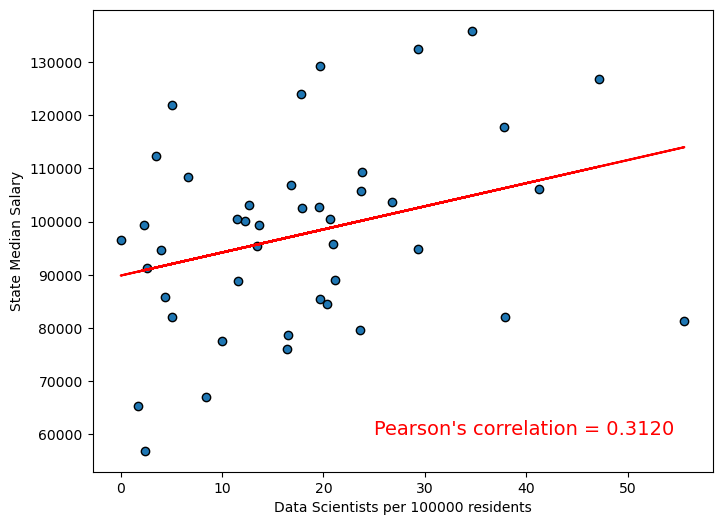

In [28]:
#Plot the jobs per capita (E-5) vs Median Salary (State) on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(states_with_pop['Jobs per Capita (E-5)'].astype(float), states_with_pop['Median Salary (State)'].astype(float),
            marker = 'o', edgecolors='black')
plt.xlabel('Data Scientists per 100000 residents') 
plt.ylabel('State Median Salary')
y_values = lin_regress_values(states_with_pop['Jobs per Capita (E-5)'].astype(float), states_with_pop['Median Salary (State)'].astype(float))
plt.plot(states_with_pop['Jobs per Capita (E-5)'].astype(float), y_values, color='red')
pearson_corr = states_with_pop['Jobs per Capita (E-5)'].corr(states_with_pop['Median Salary (State)'])
print_pearson = f"Pearson's correlation = {pearson_corr:.4f}"
#r_squared = (lin_regress_r(states_with_pop['Jobs per Capita (E-5)'].astype(float), states_with_pop['Median Salary (State)'].astype(float)) ) ** 2
#print_rsq = f'R-squared: {r_squared:.4f}'
plt.text(25, 60000, print_pearson, color='red', fontsize=14)
#uncomment the following line to save the plot as a png
#plt.savefig('scatter_JobsPerCapita_MedianSalary.png')
plt.show() 

In [21]:
#calculate the growth rate for each state using the projected and estimated jobs
states_with_pop["Growth Rate (%)"] = ''
states_with_pop["Growth Rate (%)"] = round((states_with_pop["Projected Jobs"]-states_with_pop["Estimated Jobs"])/states_with_pop["Estimated Jobs"]*100,2)

In [22]:
states_with_pop

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),2022 Population Estimates,Jobs per Capita,Jobs per Capita (E-5),Growth Rate (%)
0,AL,220,280,85870,103500,5074296,0.000043,4.335577,27.27
1,AK,90,90,100040,103500,733583,0.000123,12.26855,0.00
2,AZ,1440,2170,102770,103500,7359197,0.000196,19.567352,50.69
3,CA,18400,26700,126810,103500,39029342,0.000471,47.144018,45.11
4,CO,740,900,103200,103500,5839926,0.000127,12.671393,21.62
5,CT,860,1100,105700,103500,3626205,0.000237,23.716254,27.91
6,FL,2550,3900,100520,103500,22244823,0.000115,11.463341,52.94
7,GA,2250,3030,100400,103500,10912876,0.000206,20.617846,34.67
8,HI,50,60,112330,103500,1440196,0.000035,3.47175,20.00
9,ID,0,0,96490,103500,1939033,0.0,0.0,NaN


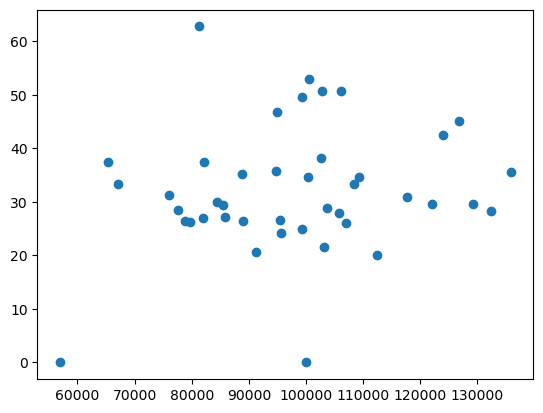

In [30]:
#include the growth rate percentages and make a scatter plot
plt.scatter(states_with_pop["Median Salary (State)"],states_with_pop["Growth Rate (%)"])

#slope, intercept, r_value, p_value, std_err = linregress(states_with_pop['Median Salary (State)'], states_with_pop['Growth Rate (%)'])
#plt.plot(states_with_pop['Median Salary (State)'], intercept + slope * states_with_pop['Median Salary (State)'], 'r', label='Linear Regression')

y_values = lin_regress_values(states_with_pop["Median Salary (State)"].astype(float), states_with_pop["Growth Rate (%)"].astype(float))
plt.plot(states_with_pop['Median Salary (State)'].astype(float), y_values, color='red')
pearson_corr = states_with_pop['Median Salary (State)'].corr(states_with_pop['Growth Rate (%)'])
print_pearson = f"Pearson's correlation = {pearson_corr:.4f}"
plt.show()

In [11]:
#include Pete's script
city_state = {
    'City': ["Seattle","Olympia","Arlington","Richmond","Trenton","Newark",
             "San Jose","San Francisco","New York City","Ithaca","Charlotte","Durham", 
             "Lexington Park","Baltimore","Honolulu","Providence","Sioux Falls"],
    'State': ["WA","WA","VA","VA","NJ","NJ","CA","CA","NY",
              "NY","NC","NC","MD","MD","HI","RI","SD"]}
    
dataframe_1 = pd.DataFrame(city_state)
dataframe_1[['# of Analysts - State', 'Median Salary - State']] = ""

#print(dataframe_1)

# Use the city API request but alter the city and state based on the dataframe
# This allows us to search national, state, and city data all from the same call
base_url = f"https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/"
params = "?training=false&interest=true&videos=false&tasks=false&dwas=false&wages=true&alternateOnetTitles=false&projectedEmployment=true&ooh=false&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false&ability=false&trainingPrograms=false"
headers = {"Authorization": f"Bearer {api_key}"}

for index, row in dataframe_1.iterrows():
    # Get the city and state
    city = dataframe_1.loc[index, "City"]
    state = dataframe_1.loc[index, "State"]
    # Add the current City type to the parameters
    api_url =  f"{base_url}{city}%2C%20{state}{params}"
    
    response_1 = requests.get(api_url, headers = headers).json()
    results = response_1['OccupationDetail'][0]['Wages']['BLSAreaWagesList']
#     results_2 = response["OccupationDetail"][0]['Projections']['Projections'][0]['ProjectedEmployment']

    try:
#         should we use estimated employment OR projected employment?
        projected_jobs = response_1["OccupationDetail"][0]['Projections']['Projections'][0]['EstimatedEmployment']
        dataframe_1.loc[index, '# of Analysts - State'] = projected_jobs
        
#         help from tutor
        median_salary = [x['Median'] for x in results if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - State'] = median_salary    

    except (KeyError, IndexError):
        dataframe_1.loc[index, 'Median Salary - State'] = "Didnt find anything"
        dataframe_1.loc[index, '# of Analysts - State'] = "Didnt find anything"

print(dataframe_1)

              City State # of Analysts - State Median Salary - State
0          Seattle    WA                 2,700                140560
1          Olympia    WA                 2,700                137750
2        Arlington    VA                 2,550                124570
3         Richmond    VA                 2,550                120000
4          Trenton    NJ                 1,820                131660
5           Newark    NJ                 1,820                130070
6         San Jose    CA                18,400                172110
7    San Francisco    CA                18,400                137680
8    New York City    NY                 3,500                130070
9           Ithaca    NY                 3,500                110760
10       Charlotte    NC                   540                134190
11          Durham    NC                   540                124960
12  Lexington Park    MD                 2,330                101760
13       Baltimore    MD          

In [12]:
#need to merge population estimates with analyst count and salary dataframe
analysts_with_pop = pd.merge(dataframe_1, state_pop_clean, how='left', on='State')
analysts_with_pop = analysts_with_pop.rename(columns={'POPESTIMATE2022':'2022 Population Estimates'})
print(analysts_with_pop.dtypes)
analysts_with_pop

City                         object
State                        object
# of Analysts - State        object
Median Salary - State        object
2022 Population Estimates     int64
dtype: object


,City,State,# of Analysts - State,Median Salary - State,2022 Population Estimates
0,Seattle,WA,"2,700",140560,7785786
1,Olympia,WA,"2,700",137750,7785786
2,Arlington,VA,"2,550",124570,8683619
3,Richmond,VA,"2,550",120000,8683619
4,Trenton,NJ,"1,820",131660,9261699
5,Newark,NJ,"1,820",130070,9261699
6,San Jose,CA,"18,400",172110,39029342
7,San Francisco,CA,"18,400",137680,39029342
8,New York City,NY,"3,500",130070,19677151
9,Ithaca,NY,"3,500",110760,19677151


In [13]:
##This chunk of code writes over the datatypes for the analysts and salary columns
##make sure to run the previous code to reset the df if need to re-run

#change number of analysts and mean salary data types to integer
analysts_with_pop['# of Analysts - State'] = analysts_with_pop['# of Analysts - State'].str.replace(',', '').astype(int)
analysts_with_pop['Median Salary - State'] = np.array(analysts_with_pop['Median Salary - State'],
                                                     dtype='int64')

In [15]:
#Make scatter plot for state population vs data analysts per state (1B)
#plt.scatter(analysts_with_pop['2022 Population Estimates'], analysts_with_pop['# of Analysts - State'],
#            marker = 'o', edgecolors='black')
#plt.xlabel('2022 State Population Estimates') 
#plt.ylabel('State Estimated Number of Data Scientists')
#y_values = lin_regress_values(analysts_with_pop['2022 Population Estimates'], analysts_with_pop['# of Analysts - City'])
#plt.plot(analysts_with_pop['2022 Population Estimates'], y_values, color='red')
##equation = lin_regress_eq(analysts_with_pop['2022 Population Estimates'], analysts_with_pop['# of Analysts - City'])
#
#r_squared =  (lin_regress_r(analysts_with_pop['2022 Population Estimates'], analysts_with_pop['# of Analysts - City'])) ** 2
#print_rsq = f'R-squared: {r_squared:.4f}'
#plt.text(4000000, 17500, print_rsq, color='red', fontsize=15)
#plt.show() 
#

In [ ]:
#Make scatter plot for state population vs projected growth per state 
#wait to add this later, need projected job values 

#plt.scatter(analysts_with_pop['2022 Population Estimates'], analysts_with_pop['# of Analysts - City'], marker = 'o', edgecolors='black') #plt.xlabel('2022 Population Estimates') 
#plt.ylabel('State Estimated Number of Analysts') #plt.show()

In [16]:
print(analysts_with_pop)
print(analysts_with_pop.dtypes)

              City State  # of Analysts - State  Median Salary - State  \
0          Seattle    WA                   2700                 140560   
1          Olympia    WA                   2700                 137750   
2        Arlington    VA                   2550                 124570   
3         Richmond    VA                   2550                 120000   
4          Trenton    NJ                   1820                 131660   
5           Newark    NJ                   1820                 130070   
6         San Jose    CA                  18400                 172110   
7    San Francisco    CA                  18400                 137680   
8    New York City    NY                   3500                 130070   
9           Ithaca    NY                   3500                 110760   
10       Charlotte    NC                    540                 134190   
11          Durham    NC                    540                 124960   
12  Lexington Park    MD              

In [ ]:
#Make scatter plot with estimated jobs vs. pay (2B)
#plt.scatter(analysts_with_pop['# of Analysts - City'], analysts_with_pop['Median Salary - City'],
#            marker = 'o', edgecolors='black')
#plt.xlabel('State Estimated Number of Analysts')
#plt.ylabel('Median Salary - City')
#y_values = lin_regress_values(analysts_with_pop['# of Analysts - City'], analysts_with_pop['Median Salary - City'])
#plt.plot(analysts_with_pop['# of Analysts - City'], y_values, color='red')
#r_squared =  lin_regress_r(analysts_with_pop['# of Analysts - City'], analysts_with_pop['Median Salary - City'])
#print_rsq = f'R-squared: {r_squared:.4f}'
#plt.text(7000, 135000, print_rsq, color='red', fontsize=15)
#plt.show() 

In [18]:
#calculate the growth rate for each state using the projected and estimated jobs
states_df["Growth Rate (%)"] = round((analysts_with_pop["Projected Jobs"]-analysts_with_pop["Estimated Jobs"])/analysts_with_pop["Estimated Jobs"]*100,2)

KeyError: 'Projected Jobs'

In [ ]:
#calculate the growth rate for each state using the projected and estimated jobs
states_df["Growth Rate (%)"] = round((analysts_with_pop["Projected Jobs"]-analysts_with_pop["Estimated Jobs"])/analysts_with_pop["Estimated Jobs"]*100,2)

#include the growth rate percentages and make a scatter plot
plt.scatter(states_df["Median Salary (State)"],states_df["Growth Rate (%)"])
pearson_corr = states_df['Median Salary (State)'].corr(states_df['Growth Rate (%)'])
slope, intercept, r_value, p_value, std_err = linregress(states_df['Median Salary (State)'], states_df['Growth Rate (%)'])
plt.plot(states_df['Median Salary (State)'], intercept + slope * states_df['Median Salary (State)'], 'r', label='Linear Regression')
print(pearson_corr)
plt.show()

In [ ]:
#try making one with estimated jobs and projected growth?
#considering including projected growth in the prior plot, maybe save the projected growth for here?
#when variable named, change out the following with the appropriate name = 'proj'
#plt.scatter(analysts_with_pop['# of Analysts - City'], analysts_with_pop['proj'],
#            marker = 'o', edgecolors='black')
#plt.xlabel('State Estimated Number of Analysts')
#plt.ylabel('Projected Growth')
#y_values = lin_regress_values(analysts_with_pop['# of Analysts - City'], analysts_with_pop['proj'])
#plt.plot(analysts_with_pop['# of Analysts - City'], y_values, color='red')
#equation = lin_regress_eq(analysts_with_pop['# of Analysts - City'], analysts_with_pop['proj'])
#plt.text(7000, 122500, equation, color='red', fontsize=15)
#r_squared =  lin_regress_r(analysts_with_pop['# of Analysts - City'], analysts_with_pop['proj'])
#print(f'The r-value is: {r_squared}')
#plt.show() 

In [ ]:
#could also do median salary vs projected growth?
#when variable named, change out the following with the appropriate name = 'proj'
#plt.scatter(analysts_with_pop['Median Salary - City'], analysts_with_pop['proj'],
#            marker = 'o', edgecolors='black')
#plt.xlabel('State Estimated Number of Analysts')
#plt.ylabel(''Median Salary - City'')
#y_values = lin_regress_values(analysts_with_pop['Median Salary - City'], analysts_with_pop['proj'])
#plt.plot(analysts_with_pop['Median Salary - City'], y_values, color='red')
#equation = lin_regress_eq(analysts_with_pop['# of Analysts - City'], analysts_with_pop['proj'])
#plt.text(7000, 122500, equation, color='red', fontsize=15)
#r_squared =  lin_regress_r(analysts_with_pop['Median Salary - City'], analysts_with_pop['proj'])
#print(f'The r-value is: {r_squared}')
#plt.show() 
